In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the data
data=pd.read_csv(r"D:\\Data Science\\Internship Ecodecamp\\telco_base_data.csv")

In [ ]:
# check data
data.head()

In [ ]:
# find nrows , ncolumns 
data.shape

In [ ]:
# check null values in per-column
data.isnull().sum()

In [ ]:
data.columns.values

In [86]:
# check datatypes
data.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

In [ ]:
#changing the data type of totalcharges into float
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [ ]:
# check null values now in per-column
data.isnull().sum()

In [ ]:
data.loc[data ['TotalCharges'].isnull() == True]

In [ ]:
# remove the null values from totalcharges
data = data.dropna(subset=['TotalCharges'])

In [ ]:
# check null values now in per-column
data.isnull().sum()

In [ ]:
# Check the descriptive statistics of numeric variables
data.describe()

In [ ]:
data['Churn'].value_counts()

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data['tenure_group'].value_counts()

In [ ]:
# Remove 'tenure' and 'customerID' columns
data = data.drop(columns=['tenure', 'customerID'])

In [60]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


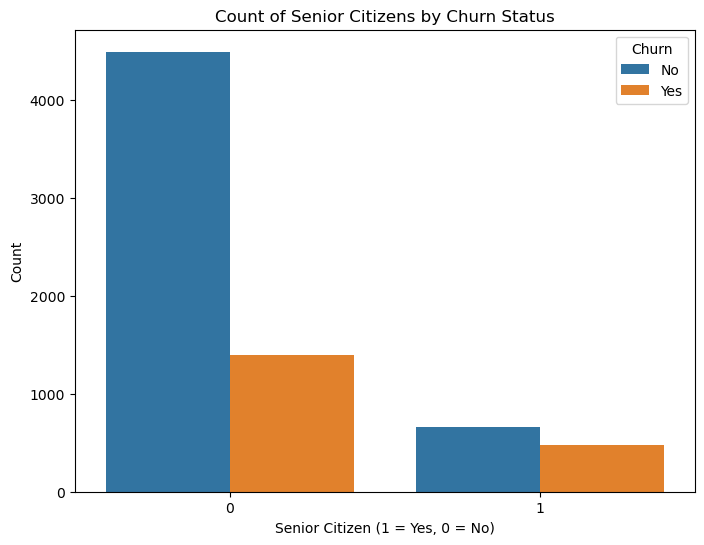

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')
plt.title('Count of Senior Citizens by Churn Status')
plt.xlabel('Senior Citizen (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# Interpretation:
#   Senior Citizens are less likely to churn as can be seen from the distribution above.

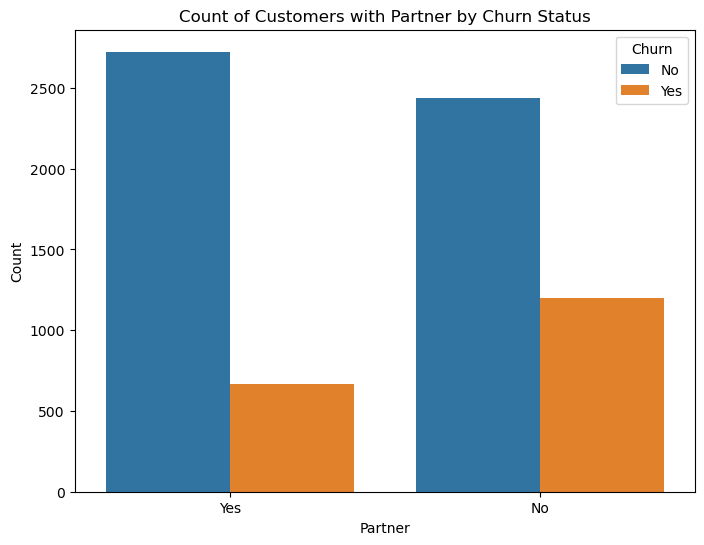

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Partner', hue='Churn')
plt.title('Count of Customers with Partner by Churn Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# Interpretation:
#   From the distribution above, it can be seen that customers without partnersare churning more in comparison to customers with partners.


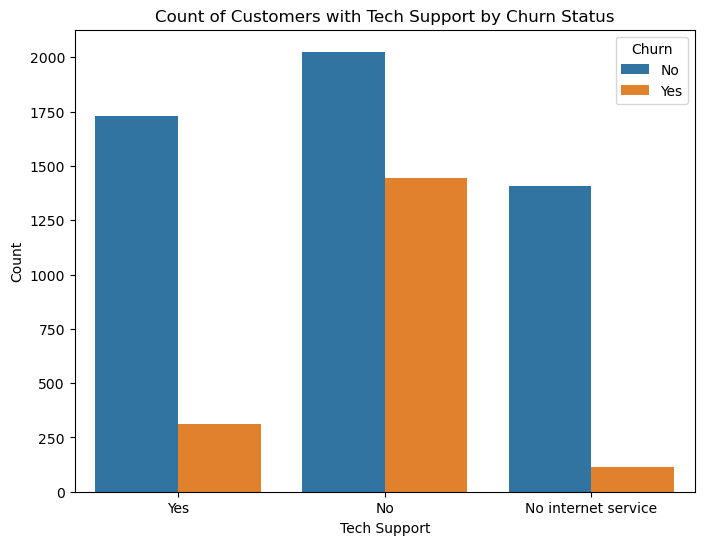

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='TechSupport', hue='Churn', order=['Yes', 'No', 'No internet service'])
plt.title('Count of Customers with Tech Support by Churn Status')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# Interpretation:
#    Customers with no tech support are churning more. The customers with no internet service are churning the least.

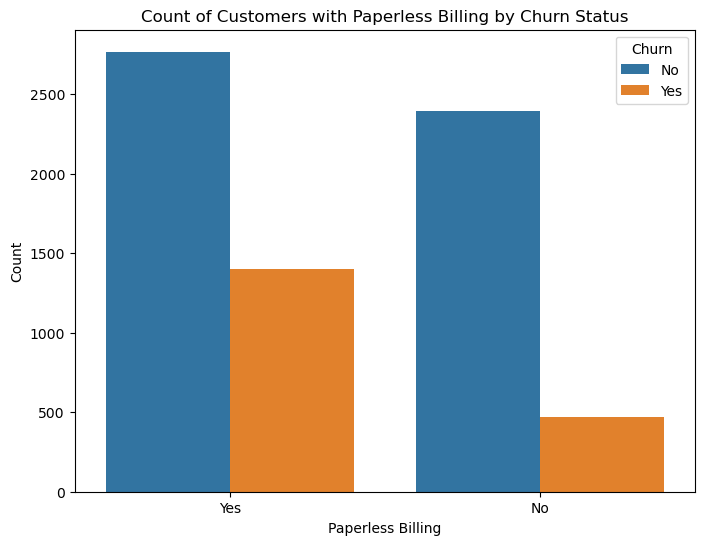

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PaperlessBilling', hue='Churn', order=['Yes', 'No'])
plt.title('Count of Customers with Paperless Billing by Churn Status')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# interpretation :
#       Customers who use Paperless Billing are churning more in comparison to their counterparts.

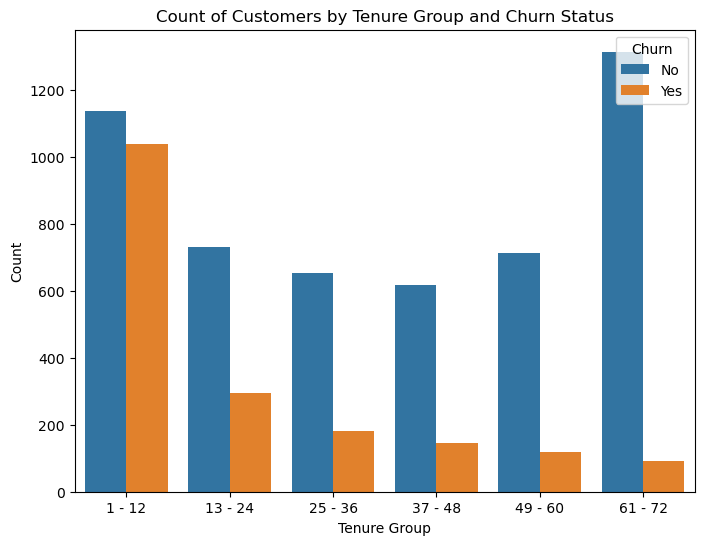

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='tenure_group', hue='Churn')
plt.title('Count of Customers by Tenure Group and Churn Status')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# interpretation :
#  Tenure groups of 1-12 and 13–24 are churning more which can be intuitively understood from the fact that teens and early 20s customers are 
#  changing their telecom services more frequently and thus are not so loyal customers in comparison to their parents or grandparents.

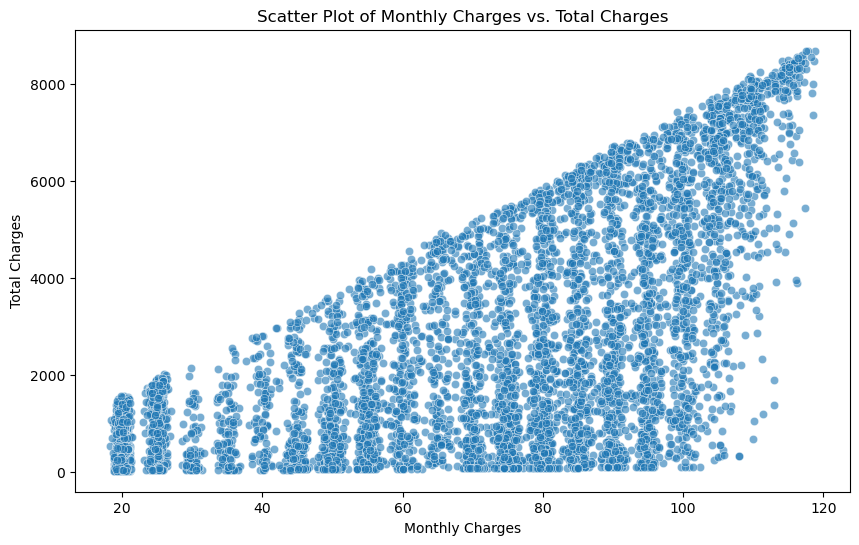

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', alpha=0.6)
plt.title('Scatter Plot of Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

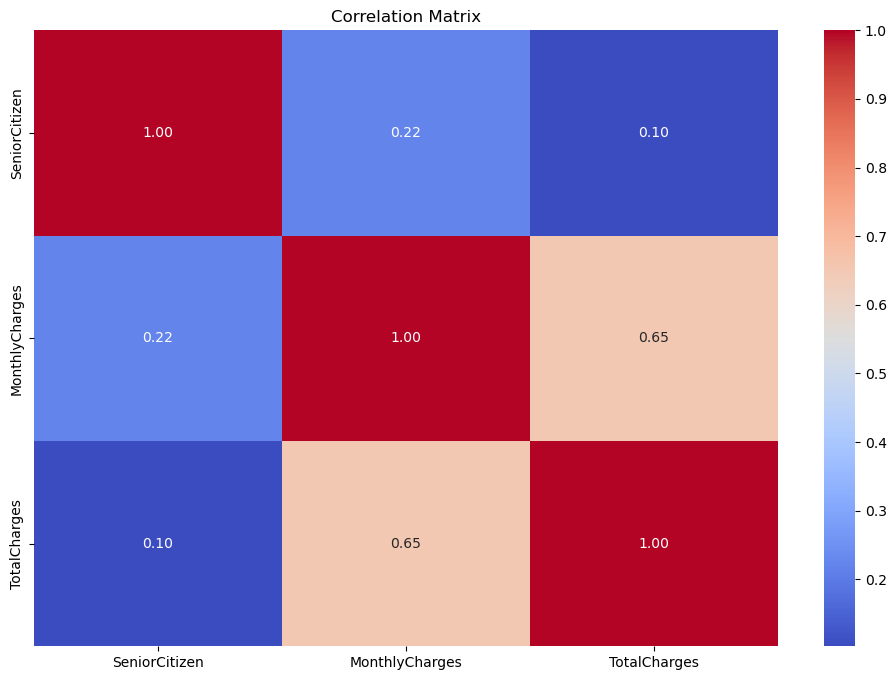

In [82]:
# Select only numeric columns for correlation
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Analyze categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Exclude the target variable if it's categorical

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'{col} vs Churn')
    plt.show()